# <font color='red'> Phase Diagram of a Harmonic Oscillator </font>

## 1. Using Arrays

### * The equation of motion for a harmonic oscillator is $\dot{x}=\frac{p}{m}$ and $\dot{p}=-m \omega^2 x$. Lets solve this with first order solver.

In [1]:
from matplotlib import pyplot as plt # We need this package to plot figures.

In [2]:
def Simple_Evolve_SHO(x,p,δt,m,ω): # Returns ẋ and ṗ for SHO.
    dx = (p/m)*δt
    dp = -m*(ω**2)*x*δt
    return dx,dp

In [3]:
# TEST as you write...
dx,dp=Simple_Evolve_SHO(2,1,1e-4,1,1)
dx,dp

(0.0001, -0.0002)

### * Do not use for Loops unless you need to. Lets see this in action by first building a "loopy way" of evaluating all this.

In [4]:
def Evolve_Many_Times(x0,p0,δt,m,ω,num):
        x=[] # Empty arrays, so that you can store x and p. Remove this and see the error python will throw.
        p=[] # Empty arrays, so that you can store x and p. Remove this and see the error python will throw.
        x.append(x0) # Append function simply adds a given entry, x0 here, as the last entry to the list.
        p.append(p0) # APPEND IS A METHOD, which means that you use .append() method to do things. This should remind you of Object Oriented Programming...
        for i in range(1,num): # WHY did I write range(1,num) and not just range(num)?
            δx,δp = Simple_Evolve_SHO(x[-1],p[-1],δt,m,ω)
            x.append(x[-1]+δx)
            p.append(p[-1]+δp)
        return x,p

In [5]:
x0=.0
p0=.01
x,p=Evolve_Many_Times(x0,p0,1e-5,1,1,10**6)

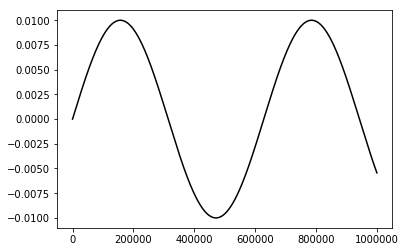

In [6]:
# Notice that this is a quick way to plot x,
# since I did not give the x-axis, plt plots x on the y-axis vs. array number on the x-axis.
plt.plot(x,'k') 

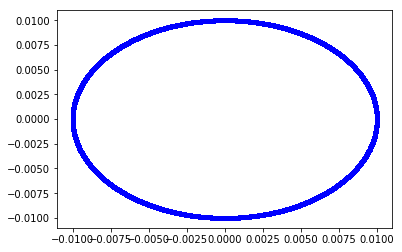

In [8]:
plt.plot(x,p,'b.')
#plt.axes().set_aspect('equal', 'datalim')

In [9]:
for i in range(6):
        %timeit Evolve_Many_Times(x0,p0,1e-5,1,1,10**i)

589 ns ± 9.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
7.84 µs ± 36.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
79.5 µs ± 384 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
802 µs ± 4.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.19 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
83.6 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


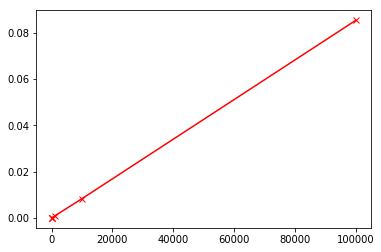

In [10]:
#IF you plot it, there is a bunch of points at the origin...
plt.plot([1,10,100,1000,10000,100000],[615*1e-9,8.06*1e-6,81.6*1e-6,818*1e-6,8.3*1e-3,85.3*1e-3],'rx-')

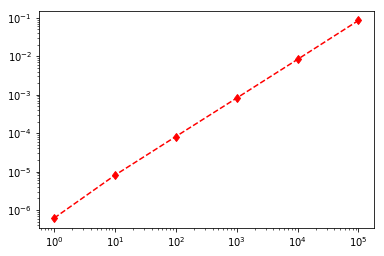

In [11]:
# Use semilogy or loglog to visualize this better
plt.loglog([1,10,100,1000,10000,100000],[615*1e-9,8.06*1e-6,81.6*1e-6,818*1e-6,8.3*1e-3,85.3*1e-3],'rd--')

## We learnt from the basic numpy notebook that numpy typically is better at this stuff. So lets see if we can make things better.

# 3. Using Integrators 
#### (see https://flothesof.github.io/harmonic-oscillator-three-methods-solution.html)

In [1]:
def deriv(u, t, omega_squared):
    "Provides derivative of vector u."
    xdot, x = u
    return [-omega_squared * x, xdot]

In [4]:
snapshot_dt = 0.3
ts = np.arange(0, 12, snapshot_dt)

In [5]:
y0 = [0, 1]

In [6]:
from scipy.integrate import odeint
scipysol = odeint(deriv, y0, ts, args=(1,))

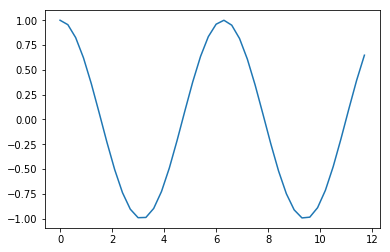

In [8]:
plt.plot(ts, scipysol[:, 1])

# 4. Doing things Smartly. Exponential of the evolution operator.

In [18]:
import numpy as np
from scipy.linalg import expm # This is the "exponential of an operator" function

In [19]:
expm? # You can learn about it by asking this help command

SyntaxError: invalid syntax (<ipython-input-19-e02ee103af6a>, line 1)

In [20]:
expm(np.zeros((2,2)))

array([[ 1.,  0.],
       [ 0.,  1.]])

# Notice that you can write $\vec{z}(t)=e^{Mt}\vec{z}(0)$

In [21]:
def Integrate_Using_Exp(δt,m,ω):
        M=np.array([[0,1/m],[-m*(ω**2),0]]) # Evaluate the matrix
        Evolution=expm(M*δt) # Evaluate its exponential
        return Evolution # Return it.

In [22]:
z0=np.random.rand(2,1) # Initialize the phase trajectory somewhere random in the unit circle.
z0

array([[ 0.91060351],
       [ 0.80907731]])

In [23]:
U=Integrate_Using_Exp(1e-5,1,1)
U

array([[  1.00000000e+00,   1.00000000e-05],
       [ -1.00000000e-05,   1.00000000e+00]])

In [24]:
def Evolve_Using_Numpy(U,z0,num):
    x=np.zeros(num)
    p=np.zeros(num)
    z=z0
    for i in range(num):
        x[i]=z[0]
        p[i]=z[1]
        z = U.dot(z)
        
    return(x,p)

In [25]:
Evolve_Using_Numpy(U,z0,10**5)

(array([ 0.91060351,  0.9106116 ,  0.91061969, ...,  1.17282613,
         1.17282283,  1.17281954]),
 array([ 0.80907731,  0.8090682 ,  0.80905909, ..., -0.32906491,
        -0.32907664, -0.32908837]))

/Users/sai/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


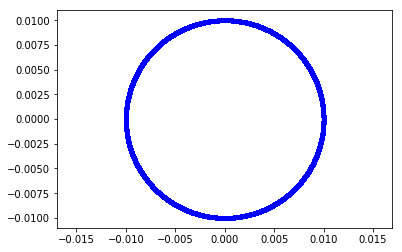

In [26]:
plt.plot(x,p,'b.')
plt.axes().set_aspect('equal', 'datalim')

In [27]:
for i in range(6):
        %timeit Evolve_Using_Numpy(U,z0,10**i)

3.69 µs ± 32.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
15.4 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
128 µs ± 322 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.28 ms ± 19.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.7 ms ± 88.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
128 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Comparing with before, nothing good seems to have been achieved. 
# Reason for that is we are not using vectorization properly. 
# We are still going through loops.

In [8]:
for i in range(6):
        %timeit Evolve_Many_Times(x0,p0,1e-5,1,1,10**i)

622 ns ± 26 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
8.32 µs ± 653 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
131 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.57 ms ± 297 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
9.64 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
114 ms ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
z0

array([[ 0.94302585],
       [ 0.35313591]])

In [59]:
U

array([[  1.00000000e+00,   1.00000000e-05],
       [ -1.00000000e-05,   1.00000000e+00]])

In [29]:
from numpy.linalg import matrix_power
matrix_power(U, 2).dot(z0).transpose()

array([[ 0.91061969,  0.80905909]])

In [30]:
def Evolve_Using_Numpy_List_Comp(U,z0,num): # I have added List_Comp for list comprehension
    Z=[(matrix_power(U, i)).dot(z0).transpose() for i in range(num)]
    return Z

In [31]:
Z=Evolve_Using_Numpy_List_Comp(U,z0,5)

In [32]:
for i in range(5):
    %timeit Evolve_Using_Numpy_List_Comp(U,z0,10**i)

12.2 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
103 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.51 ms ± 8.98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
20.4 ms ± 421 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
259 ms ± 6.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Still no speedup. So whats happening?
## <font color='Green'> Conjecture: Maybe 2x2 matrices dont show the speedup. Lets try higher dim. </font>

In [33]:
Dim = 10


In [42]:
δt=1e-5
F = np.random.rand(Dim,Dim) +1j*np.random.rand(Dim,Dim) 
Fd=F.conj().T
H=F.dot(Fd)
U=expm(-1j*H*δt)

In [44]:
z0=np.random.rand(Dim)

In [45]:
U.dot(z0)

array([ 0.37726611-0.00022893j,  0.10430270-0.00018358j,
        0.68568571-0.00015507j,  0.06069801-0.00020462j,
        0.92051809-0.00020959j,  0.01878142-0.00022922j,
        0.71591128-0.00021039j,  0.74204068-0.00021472j,
        0.14263325-0.0001223j ,  0.06461020-0.00019095j])

In [46]:
for i in range(5):
    %timeit Evolve_Using_Numpy_List_Comp(U,z0,10**i)

13.7 µs ± 223 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
135 µs ± 304 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.22 ms ± 34 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
30.5 ms ± 517 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
387 ms ± 3.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# EXERCISES: 
## [1] Investigate the conjecture.
## [2] Check that for Pauli matrices, $\sigma_i\sigma_j=2\delta_{ij}+2i\varepsilon_{ijk}\sigma_k$
## [3] Write a code to solve time dependant phase trajectory for damped SHO $\ddot{x}+\omega^2 x+\dot{x}=\epsilon\cos(\omega_d t)$